[22.26591338562494, 24.109381093991587, 27.437732189575264, 28.708573542911022, 31.279336102151547, 31.516114847350416, 26.084440874566834, 30.2020979191101, 30.109966209348098, 29.670465864817523, 30.942548468733932, 35.842347440756186, 30.153201527448424, 28.724689651311614, 31.38973385545915, 31.704042597072874, 32.710650401496345, 36.45029462604771, 29.245084637393923, 36.99221982993936, 31.87666066053568, 32.909648683883965, 32.090029177723764, 27.9828914000482, 29.24422448475691, 29.196110712268, 29.334898688843396, 31.750283530424394, 30.18480128004021, 30.69790235972887, 28.87690517660577, 29.998665774995363, 32.43803378207639, 26.822600795770775, 22.832350505579868, 31.60354995359087, 25.706835174256053, 20.814951102987422, 22.857521773445782, 15.14263516689633]


(array([ 1.,  0.,  1.,  3.,  2.,  4., 13., 11.,  2.,  3.]),
 array([15.14263517, 17.32759363, 19.5125521 , 21.69751057, 23.88246903,
        26.0674275 , 28.25238596, 30.43734443, 32.6223029 , 34.80726136,
        36.99221983]),
 <a list of 10 Patch objects>)

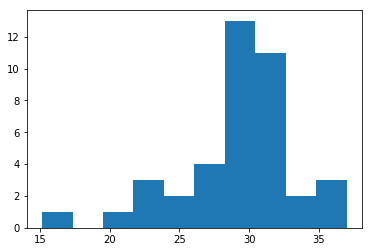

In [143]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.tight_layout()
import time

class site:
    def __init__(self, position, properties):
        self.index = position
        for name,value in properties.items():
            setattr(self, name, value)
        

class AndersonHopp:
    def __init__(self, size, tee, W):
        self.Uave = Uave
        self.Ustdev = Ustdev
        self.L = int(size)
        self.system = []
        self.spectrum = []
        self.eigen = []
        self.x = []
        for i in range(L):
            self.x.append(np.exp(i * 1j * math.pi * 2 / self.L))
        self.x = np.diag(self.x)
        self.H = np.zeros((self.L,self.L)) + t*(np.diag(np.ones(self.L-1),1) + np.diag(np.ones(self.L-1),-1))
        for i in range(self.L):
            self.system.append(site(i, {'t':tee, 'U':np.random.uniform(-W/2,W/2)}))
            self.H[i,i] = self.system[i].U
        self.solve()
        
        
        
    def solve(self):
        temp = np.linalg.eigh(self.H)
        self.spectrum = temp[0]
        self.eigen = temp[1]
#        for wave in self.eigen:
 #           out, sub = plt.subplots(1)
  #          sub.plot(wave)


#these won't work yet
    def reparam(self, UaveNew, UstdevNew):
        self.Uave = UaveNew
        self.Ustdev = UstdevNew
        self.rescramble()
    
    def rescramble(self, UaveSingle = None, UstdevSingle = None):
        if Unew == None:
            UaveSingle = self.Uave
            UstdevSingle = self.Ustdev
        for i in range(self.L):
            self.system[i].U = np.random.normal(UaveSingle,UstdevSingle)
            self.H[i,i] = self.system[i].U
        self.solve()
    
    def CoM(self, index=-.5):
        out = []
        if not(index+.5):
            for i in range(self.L):
                out.append(self.L/(2*math.pi) * np.imag(np.log(np.vdot(self.eigen[i], np.dot(self.x, self.eigen[i])))))
        else:
            if index == int(index) and abs(index + .5)<self.L:
                return (self.L/(2*math.pi) * np.imag(np.log(np.vdot(self.eigen[index], np.dot(self.x, self.eigen[index])))))
            else:
                print("CoM passed bad index")
                return
        return out
    
    def locLength(self, index=-.5):
        out = []
        wf = []
        loclens = []
        if not(index+.5):
            centers = np.rint(self.CoM())
            for i in range(self.L):
                wf = self.eigen[i]
                loclens.append(0)
                for j in range(-int(self.L/2),int(self.L/2)):
                    loclens[-1] += np.sqrt((j*wf[int(centers[i])+j])**2)
            print(loclens)
            return loclens
        else:
            if index == int(index) and abs(index + .5)<self.L:
                wf = self.eigen[index]
                loclen = 0
                center = np.rint(self.CoM(index))
                for j in range(-int(self.L/2),int(self.L/2)):
                    loclen += np.sqrt((j*wf[int(centers[index])+j])**2)
                return loclen
            else:
                print("locLength passed bad index")
                return
        return out
    
#    def WFout(self):
 #       vector = []
  #      for site in self.system:
   #         vector.append(site.wf)
    #    return vector
    
    def E(self):
        E=0
        for i in range(int(-self.L/2),int(self.L/2)):
            E+=self.system[i].wf*self.Hi(i)
        return E
    
    def Hi(self, i):
        return (t*(self.system[i-1].wf + self.system[i+1].wf) + self.system[i].U * self.system[i].wf)
    
#    def timeEvolve(self, dt):
#        wfnext = [0]*L
 #       for i in range(int(-L/2),int(L/2)):
  #          wfnext[i] = exp(j*dt*Hi(i))


L = 40
t = 1
Uave = 5
Ustdev = 1.25

gaussian = AndersonHopp(L, t, Uave, Ustdev)

#print(gaussian.eigen[4])
#print(gaussian.CoM(),gaussian.spectrum)
out, sub = plt.subplots(1)
sub.hist(gaussian.locLength())

#for sites in test.system:
#    print(sites.t)
#    print(sites.U)

